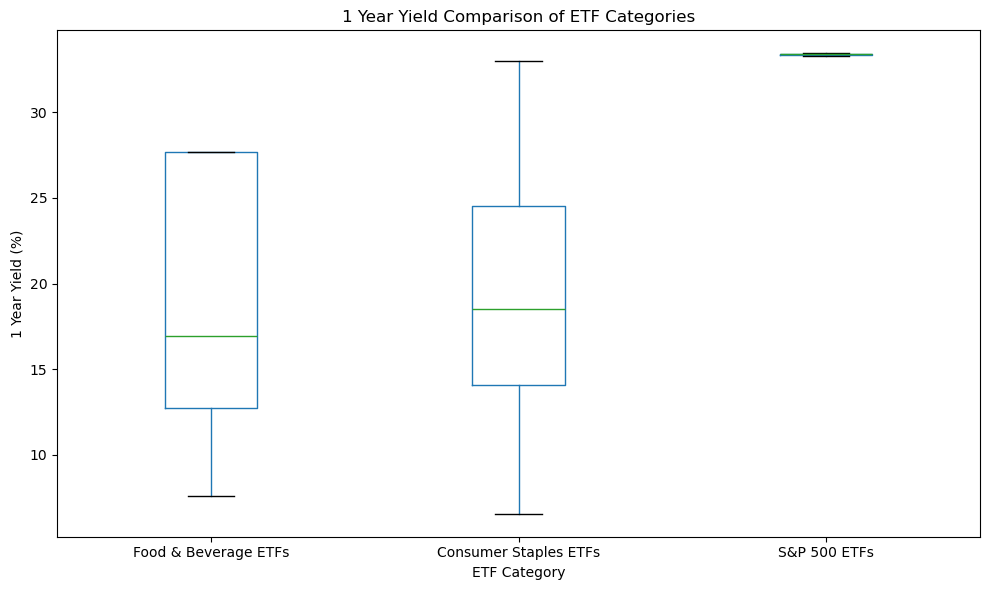

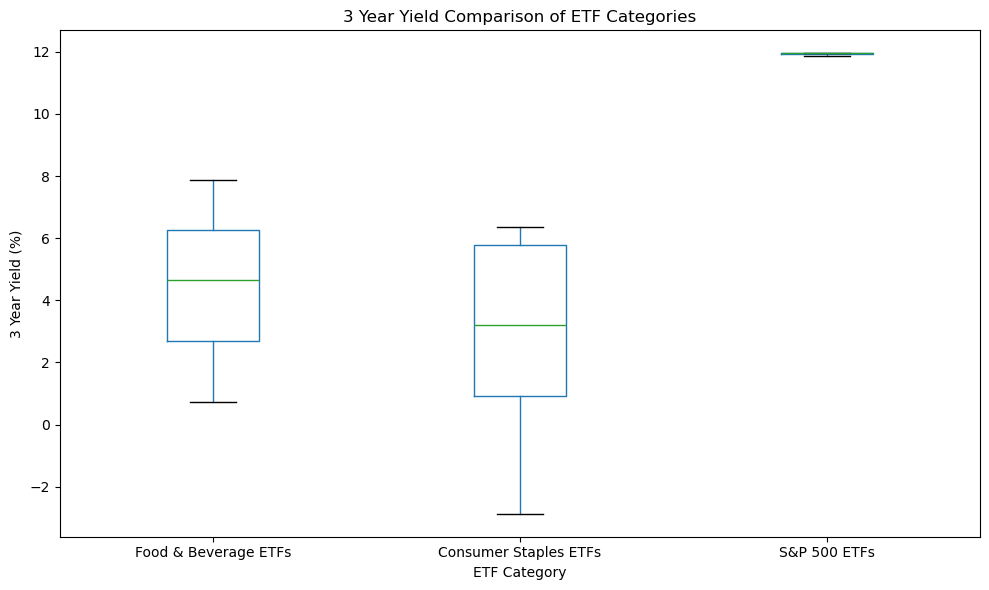

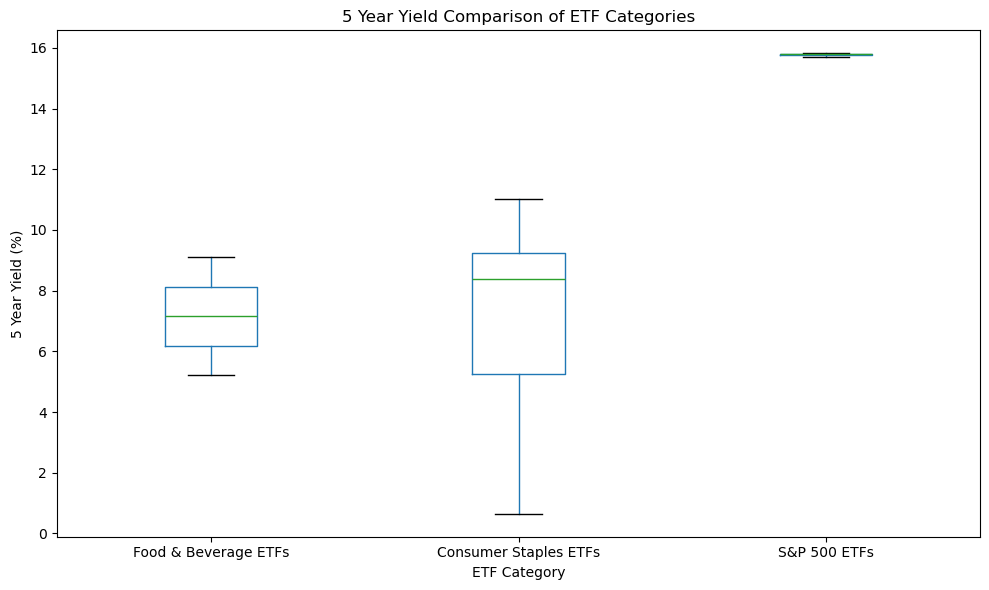


Comparison of Average Yields:
        Food & Beverage ETFs Average Yield  \
1 Year                           23.425000   
3 Year                            4.413333   
5 Year                            7.160000   

        Consumer Staples ETFs Average Yield  S&P 500 ETFs Average Yield  
1 Year                            19.410000                   33.370000  
3 Year                             1.220000                   11.926667  
5 Year                             7.030769                   15.773333  

Sharpe Ratios for ETFs:
        Food & Beverage Sharpe Ratio  Consumer Staples Sharpe Ratio  \
1 Year                      1.181604                       2.448880   
3 Year                      1.219239                       0.172356   
5 Year                      2.581157                       2.078010   

        S&P 500 ETFs Sharpe Ratio  
1 Year                 345.596298  
3 Year                 294.071710  
5 Year                 276.657886  

Food & Beverage ETFs - Beta Summa

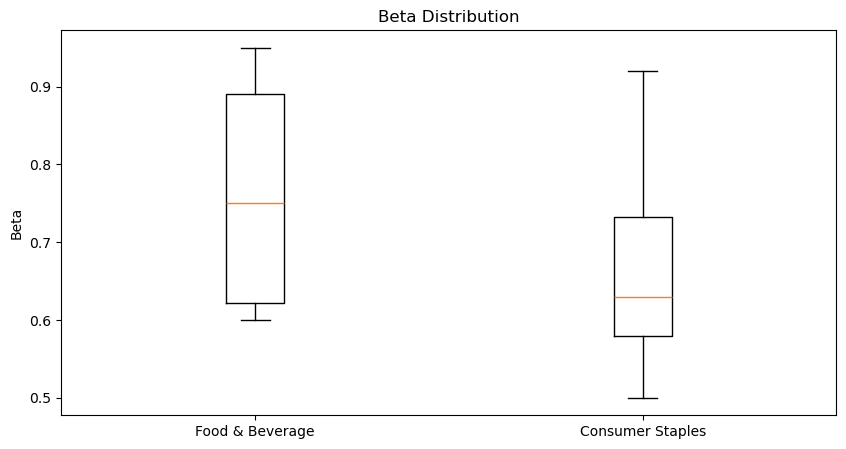

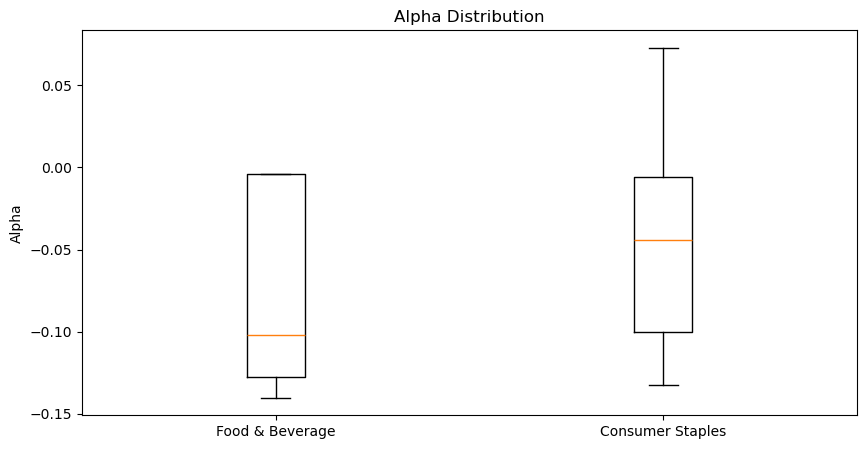

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
food_beverage_etfs = pd.read_csv('food&beverage_etf.csv')
consumer_staples_etfs = pd.read_csv('broadconsumerstaples_etf.csv')
sp_etf = pd.read_csv('sp_etf.csv', sep=';', decimal=',')  # Use decimal=',' to handle comma as decimal separator

# Filter out rows where 'Inverse' column is 'No'
food_beverage_etfs = food_beverage_etfs[food_beverage_etfs['Inverse'] == 'No']
consumer_staples_etfs = consumer_staples_etfs[consumer_staples_etfs['Inverse'] == 'No']

# Replace 'N/A' and other non-numeric values with NaN
food_beverage_etfs.replace('N/A', np.nan, inplace=True)
consumer_staples_etfs.replace('N/A', np.nan, inplace=True)
sp_etf.replace('N/A', np.nan, inplace=True)

# Target columns for averaging
columns_to_average = ['1 Year', '3 Year', '5 Year']

# Remove percentage and other non-numeric characters
def clean(series):
    return series.str.replace('%', '').str.replace(',', '.').astype(float)

food_beverage_etfs[columns_to_average] = food_beverage_etfs[columns_to_average].apply(clean)
consumer_staples_etfs[columns_to_average] = consumer_staples_etfs[columns_to_average].apply(clean)
sp_etf[columns_to_average] = sp_etf[columns_to_average].apply(clean)

# Prepare data for box plot by separating each year into individual DataFrames
for year in columns_to_average:
    plt.figure(figsize=(10, 6))
    plt.title(f"{year} Yield Comparison of ETF Categories")
    plt.xlabel("ETF Category")
    plt.ylabel(f"{year} Yield (%)")
    
    # Select data for the specific year
    year_data = pd.DataFrame({
        "Food & Beverage ETFs": food_beverage_etfs[year].dropna(),
        "Consumer Staples ETFs": consumer_staples_etfs[year].dropna(),
        "S&P 500 ETFs": sp_etf[year].dropna()
    })
    
    # Plot each year individually
    year_data.boxplot(grid=False, showfliers=False)
    plt.tight_layout()
    plt.show()

# Calculate the average yields for each ETF category
food_beverage_avg_yields = food_beverage_etfs[columns_to_average].mean()
consumer_staples_avg_yields = consumer_staples_etfs[columns_to_average].mean()
sp_etf_avg_yields = sp_etf[columns_to_average].mean()

# Create a DataFrame for side-by-side comparison
comparison_df = pd.DataFrame({
    'Food & Beverage ETFs Average Yield': food_beverage_avg_yields,
    'Consumer Staples ETFs Average Yield': consumer_staples_avg_yields,
    'S&P 500 ETFs Average Yield': sp_etf_avg_yields
})
print("\nComparison of Average Yields:")
print(comparison_df)

# Sharpe Ratio Calculation
# Assuming the risk-free rate is 4.19% (0.0419)
risk_free_rate = 0.0419

# Calculate excess returns
food_beverage_excess = food_beverage_avg_yields - risk_free_rate
consumer_staples_excess = consumer_staples_avg_yields - risk_free_rate
sp_etf_excess = sp_etf_avg_yields - risk_free_rate

# Calculate standard deviations of returns
food_beverage_std = food_beverage_etfs[columns_to_average].std()
consumer_staples_std = consumer_staples_etfs[columns_to_average].std()
sp_etf_std = sp_etf[columns_to_average].std()

# Compute Sharpe Ratios
food_beverage_sharpe = food_beverage_excess / food_beverage_std
consumer_staples_sharpe = consumer_staples_excess / consumer_staples_std
sp_etf_sharpe = sp_etf_excess / sp_etf_std

# Display Sharpe Ratios
sharpe_ratios_df = pd.DataFrame({
    'Food & Beverage Sharpe Ratio': food_beverage_sharpe,
    'Consumer Staples Sharpe Ratio': consumer_staples_sharpe,
    'S&P 500 ETFs Sharpe Ratio': sp_etf_sharpe
})
print("\nSharpe Ratios for ETFs:")
print(sharpe_ratios_df)

food_beverage_etfs['Beta'] = pd.to_numeric(food_beverage_etfs['Beta'], errors='coerce')
consumer_staples_etfs['Beta'] = pd.to_numeric(consumer_staples_etfs['Beta'], errors='coerce')

# Calculate Alpha for each ETF category separately
food_beverage_etfs['Alpha'] = food_beverage_etfs.apply(
    lambda row: ((row['1 Year'] / 100) - risk_free_rate) - 
                (market_return - risk_free_rate) * (row['Beta'] if pd.notnull(row['Beta']) else np.nan), 
    axis=1
)

consumer_staples_etfs['Alpha'] = consumer_staples_etfs.apply(
    lambda row: ((row['1 Year'] / 100) - risk_free_rate) - 
                (market_return - risk_free_rate) * (row['Beta'] if pd.notnull(row['Beta']) else np.nan), 
    axis=1
)

# Print summary statistics for Beta and Alpha
print("\nFood & Beverage ETFs - Beta Summary Statistics:")
print(food_beverage_etfs['Beta'].describe())

print("\nConsumer Staples ETFs - Beta Summary Statistics:")
print(consumer_staples_etfs['Beta'].describe())

print("\nFood & Beverage ETFs - Alpha Summary Statistics:")
print(food_beverage_etfs['Alpha'].describe())

print("\nConsumer Staples ETFs - Alpha Summary Statistics:")
print(consumer_staples_etfs['Alpha'].describe())

# Plot Beta box plots side-by-side
plt.figure(figsize=(10, 5))
data_beta = [food_beverage_etfs['Beta'].dropna(), consumer_staples_etfs['Beta'].dropna()]
plt.boxplot(data_beta, labels=['Food & Beverage', 'Consumer Staples'], showfliers=False)
plt.title('Beta Distribution')
plt.ylabel('Beta')
plt.show()

# Plot Alpha box plots side-by-side
plt.figure(figsize=(10, 5))
data_alpha = [food_beverage_etfs['Alpha'].dropna(), consumer_staples_etfs['Alpha'].dropna()]
plt.boxplot(data_alpha, labels=['Food & Beverage', 'Consumer Staples'], showfliers=False)
plt.title('Alpha Distribution')
plt.ylabel('Alpha')
plt.show()